In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [92]:
df=pd.read_csv("bmd_logistic_regression.csv")

In [93]:
df

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...,...
164,21892,77.982543,M,fracture,74.0,164.0,No medication,49,0.7941
165,24140,50.285303,F,fracture,59.0,161.0,No medication,6,0.7971
166,6969,46.359721,M,fracture,67.0,169.0,No medication,10,0.8037
167,5505,54.788368,M,fracture,70.0,166.0,No medication,14,0.8072


In [94]:
print("*********This Dataset contains physical and medical details patients, using i will be making a prediction model to predict weather a person is prone to get a bone fracture or not*********")
print("\n\n*********************************************Features****************************************************")
print("\n\n\t\t(1)id=id of individual.\n\t\t(2)age=age of person.\n\t\t(3)sex=gender of a person.\n\t\t(4)fracture= fracture status of person\n\t\t(5)weight in kg and height in cm given.\n\t\t(6)Medication= medication any person is taking.\n\t\t(7)bmd= Bone mineral density of individual.")

*********This Dataset contains physical and medical details patients, using i will be making a prediction model to predict weather a person is prone to get a bone fracture or not*********


*********************************************Features****************************************************


		(1)id=id of individual.
		(2)age=age of person.
		(3)sex=gender of a person.
		(4)fracture= fracture status of person
		(5)weight in kg and height in cm given.
		(6)Medication= medication any person is taking.
		(7)bmd= Bone mineral density of individual.


What's the meaning of BMD?

Bone mineral density: BMD, a measure of bone density, reflecting the strength of bones 
    as represented by calcium content. The BMD test detects osteopenia (mild bone loss, usually without symptoms) 
        and osteoporosis (more severe bone loss, which may cause symptoms).

In [95]:
print("************************************************Analysis************************************************************")
print("\n\n\t***So we have total of 9 columns out of which 6 are numercial and 3 are categorical columns.***\n\n\t***Data set has 169 rows and 9 columns***\n\n")
df.info()

************************************************Analysis************************************************************


	***So we have total of 9 columns out of which 6 are numercial and 3 are categorical columns.***

	***Data set has 169 rows and 9 columns***


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            169 non-null    int64  
 1   age           169 non-null    float64
 2   sex           169 non-null    object 
 3   fracture      169 non-null    object 
 4   weight_kg     169 non-null    float64
 5   height_cm     169 non-null    float64
 6   medication    169 non-null    object 
 7   waiting_time  169 non-null    int64  
 8   bmd           169 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 12.0+ KB


# PREPROCESSING.

In [96]:
df.isnull().sum()/len(df)*100

id              0.0
age             0.0
sex             0.0
fracture        0.0
weight_kg       0.0
height_cm       0.0
medication      0.0
waiting_time    0.0
bmd             0.0
dtype: float64

In [97]:
print("\n\t~~So there are no null values in this data set\n\n\t~~Droping id,waiting time columns as i donot require id column in my analysis.")


	~~So there are no null values in this data set

	~~Droping id,waiting time columns as i donot require id column in my analysis.


In [98]:
df.drop("id",axis=1,inplace=True)

In [99]:
df.drop("waiting_time",axis=1,inplace=True)

# UNIVARIATE ANALYSIS.

In [100]:
df.describe()

,age,weight_kg,height_cm,bmd
count,169.000000,169.000000,169.000000,169.000000
mean,63.631531,64.665680,160.254438,0.783104
std,12.356936,11.537171,7.928272,0.166529
min,35.814058,36.000000,142.000000,0.407600
25%,54.424211,56.000000,154.000000,0.670800
50%,63.487837,64.500000,160.500000,0.786100
75%,72.080558,73.000000,166.000000,0.888800
max,88.753795,96.000000,177.000000,1.362400


In [101]:
num_col=df.select_dtypes(include=["int","float"])
num_col.columns

Index(['age', 'weight_kg', 'height_cm', 'bmd'], dtype='object')


***********************************ALL COLUMNS ARE NORMALLY DISTRIBUTED**********************************************


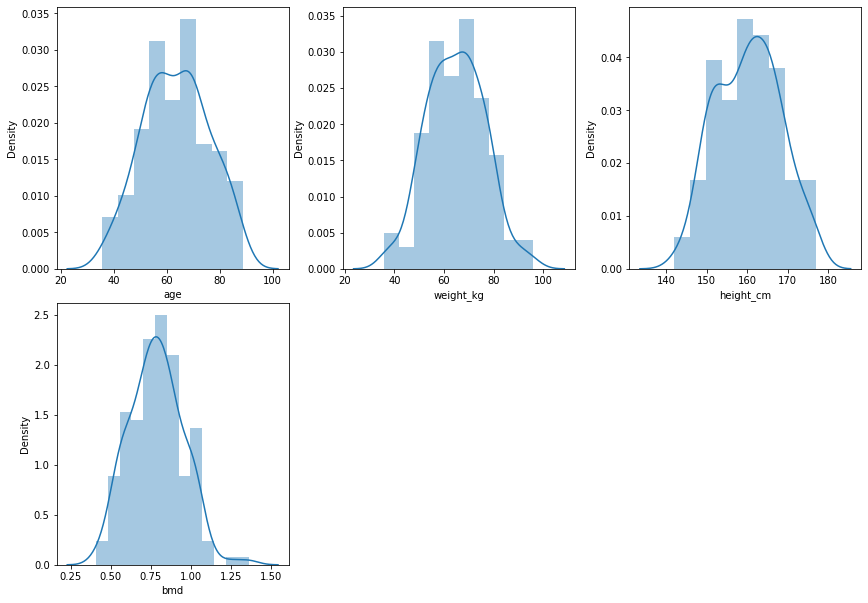

In [102]:
print("\n***********************************ALL COLUMNS ARE NORMALLY DISTRIBUTED**********************************************")
plt.figure(figsize=(12,12))
count=1
for i in num_col:
    plt.subplot(3,3,count)
    sns.distplot(df[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [103]:
cat_col=df.select_dtypes(include="O")
cat_col.columns

Index(['sex', 'fracture', 'medication'], dtype='object')

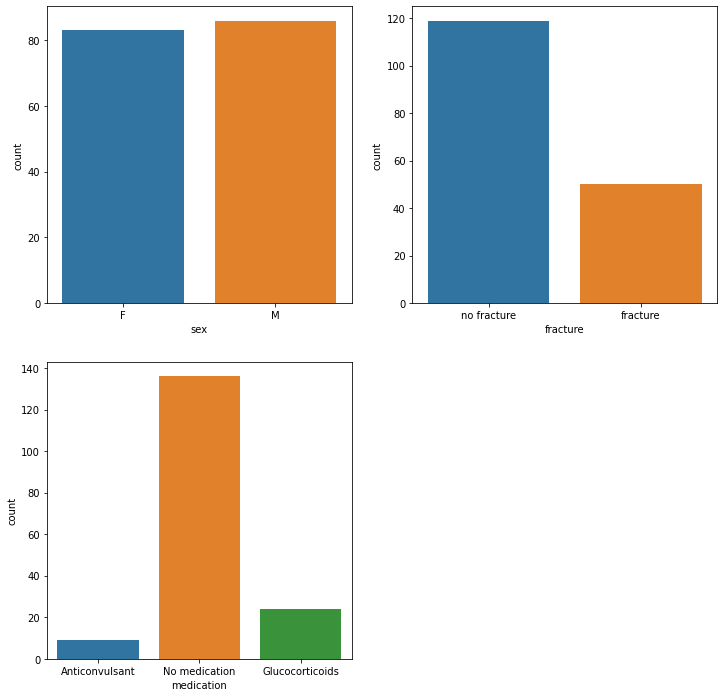

In [104]:
plt.figure(figsize=(12,12))
count=1
for i in cat_col:
    plt.subplot(2,2,count)
    sns.countplot(df[i])
    count+=1
plt.show()

In [105]:
print("\n\t\t(1)Male and female count is almost equal\n\n\t\t(2)My target variable Fracture is imbalanced(On the side of no fracture\n\n\t\t(3)Highest number of people are not on any medications.")


		(1)Male and female count is almost equal

		(2)My target variable Fracture is imbalanced(On the side of no fracture

		(3)Highest number of people are not on any medications.


# Bivariate analysis.

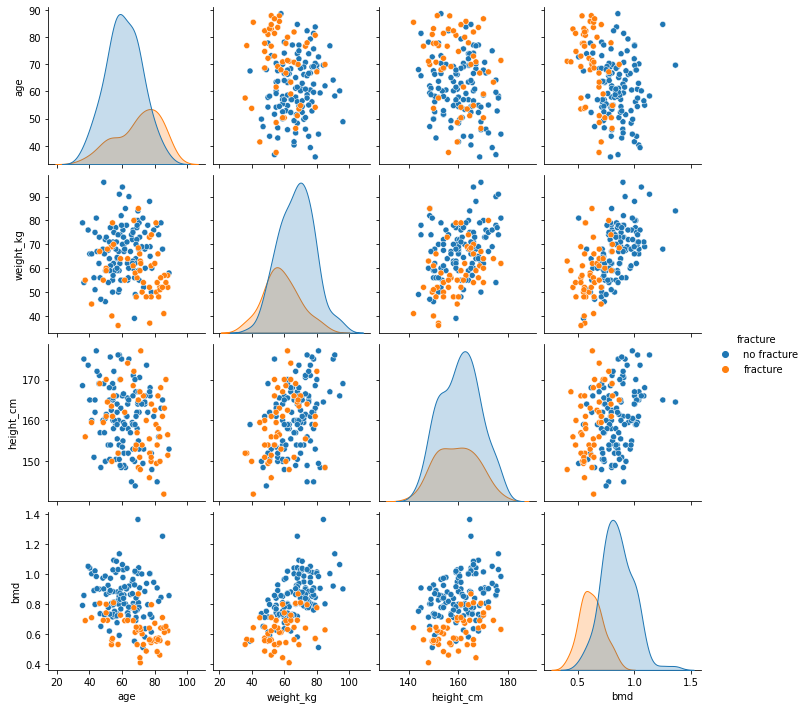

In [106]:
sns.pairplot(df,hue="fracture")
plt.show()

In [107]:
print("***********************************************ANALYSIS*************************************************************")
print("\n\t\t(1)Aged people have high chance of getting fracture.\n\t\t(2)people with low body weight are getting more fractures.\n\t\t(3)Height has no impact on getting fracture.\n\t\t(4)People with less bone density have high chance of getting fracture.")

***********************************************ANALYSIS*************************************************************

		(1)Aged people have high chance of getting fracture.
		(2)people with low body weight are getting more fractures.
		(3)Height has no impact on getting fracture.
		(4)People with less bone density have high chance of getting fracture.



		(1)Gender has no impact on Fracture.


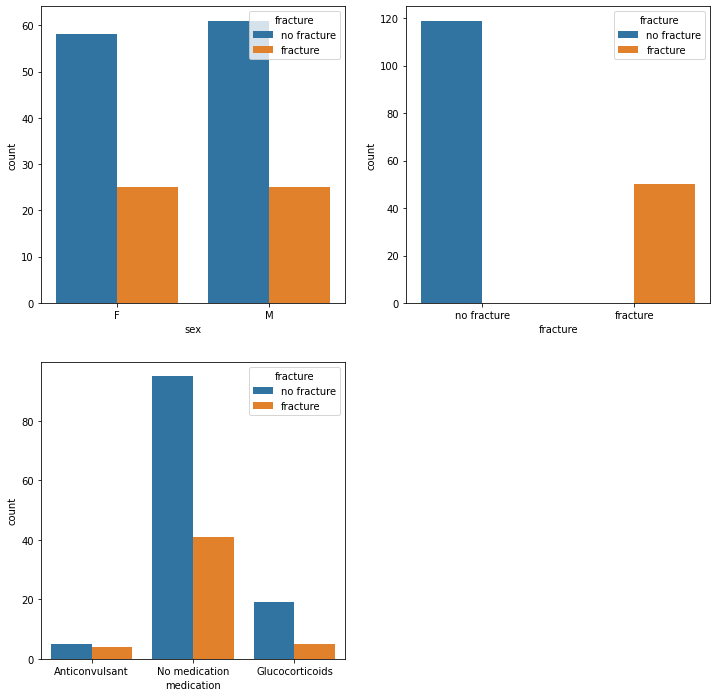

In [108]:
print("\n\t\t(1)Gender has no impact on Fracture.")
plt.figure(figsize=(12,12))
count=1
for i in cat_col:
    plt.subplot(2,2,count)
    sns.countplot(x=i,hue="fracture",data=df)
    count+=1
plt.show()

# Encoding Categorical Features.

In [109]:
for i in cat_col:
    print(i)
    print(df[i].unique())

sex
['F' 'M']
fracture
['no fracture' 'fracture']
medication
['Anticonvulsant' 'No medication' 'Glucocorticoids']


In [110]:
def gender(i):
    if 'F' in i:
        return(0)
    else:
        return(1)

In [111]:
df["sex"]=df['sex'].map(gender)
df["sex"]=df["sex"].astype("int")

In [112]:
def fracture(i):
    if "no fracture" in i:
        return(0)
    else:
        return(1)

In [113]:
df["fracture"]=df["fracture"].map(fracture)
df["fracture"]=df["fracture"].astype("int")

In [114]:
df=pd.get_dummies(df,drop_first=True)

In [115]:
df.rename(columns = {'medication_No medication':'medication_No_medication'}, inplace = True)

In [116]:
df["age"]=df["age"].astype("int")

In [117]:
df["FRACTURE"]=df["fracture"]
df.drop("fracture",axis=1,inplace=True)

In [118]:
df

,age,sex,weight_kg,height_cm,bmd,medication_Glucocorticoids,medication_No_medication,FRACTURE
0,57,0,64.0,155.5,0.8793,0,0,0
1,75,0,78.0,162.0,0.7946,0,1,0
2,70,1,73.0,170.5,0.9067,0,1,0
3,78,0,60.0,148.0,0.7112,0,1,0
4,54,1,55.0,161.0,0.7909,0,1,0
...,...,...,...,...,...,...,...,...
164,77,1,74.0,164.0,0.7941,0,1,1
165,50,0,59.0,161.0,0.7971,0,1,1
166,46,1,67.0,169.0,0.8037,0,1,1
167,54,1,70.0,166.0,0.8072,0,1,1


In [119]:
#Creating a copy of dataframe so that for logistic regression scalled data can be used and for all other algorithms non scalled data can be used

In [120]:
df1=df.copy()

# FEATURE ENGINERRING.

# Using Standard scalar for scaling my features so that there wont be weightage problem while building model.

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc=StandardScaler()

In [45]:
for i in num_col.columns:
    df1[i]=sc.fit_transform(df1[[i]])

In [46]:
df1

,age,sex,weight_kg,height_cm,bmd,medication_Glucocorticoids,medication_No_medication,FRACTURE
0,-0.498079,0,-0.057870,-0.601464,0.579369,0,0,0
1,0.965840,0,1.159205,0.220824,0.069237,0,1,0
2,0.559196,1,0.724535,1.296122,0.744394,0,1,0
3,1.209827,0,-0.405606,-1.550257,-0.433065,0,1,0
4,-0.742066,1,-0.840276,0.094318,0.046953,0,1,0
...,...,...,...,...,...,...,...,...
164,1.128498,1,0.811469,0.473835,0.066226,0,1,1
165,-1.067381,0,-0.492540,0.094318,0.084294,0,1,1
166,-1.392696,1,0.202932,1.106364,0.124045,0,1,1
167,-0.742066,1,0.463733,0.726846,0.145125,0,1,1


In [49]:
num_columns=df1.select_dtypes(include=["int","float"])

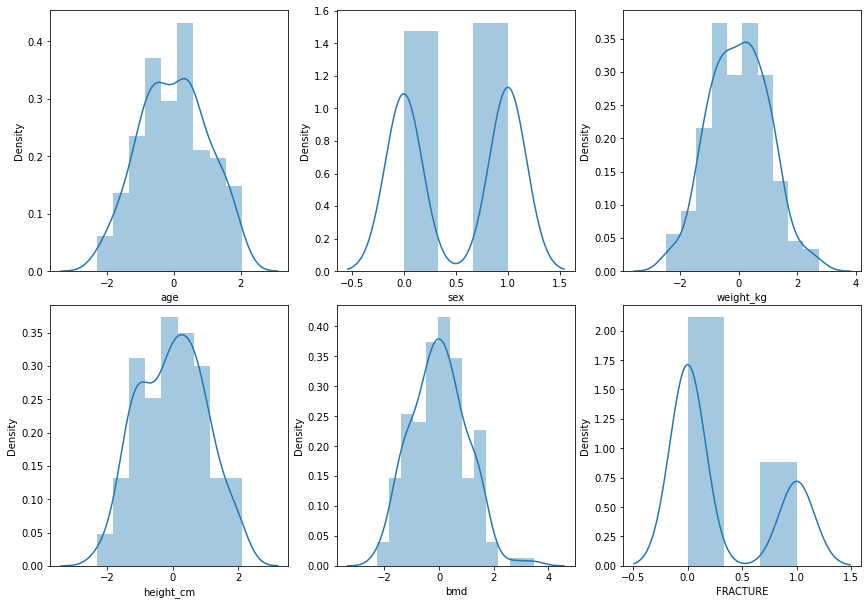

In [50]:
plt.figure(figsize=(12,12))
count=1
for i in num_columns:
    plt.subplot(3,3,count)
    sns.distplot(df1[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

# spliting data.

In [51]:
X=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [52]:
X.shape

(169, 7)

In [53]:
y.shape

(169,)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=25)

# Oversampling data to avoid problem of imbalanced ratio of fracture and non fracture.

In [55]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(sampling_strategy=1.0)

In [56]:
X_train_res, y_train_res=os.fit_resample(X_train,y_train)

# LOGISTIC REGRESSION.

# Model building.

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
reg=LogisticRegression()

In [87]:
reg.fit(X_train_res, y_train_res)

LogisticRegression()

In [88]:
y_pred_train=reg.predict(X_train_res)
y_pred_test=reg.predict(X_test)

# Evaluation.

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
print("Train Data")
print(classification_report(y_train_res,y_pred_train))
print("Test Data")
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        93
           1       0.84      0.87      0.86        93

    accuracy                           0.85       186
   macro avg       0.86      0.85      0.85       186
weighted avg       0.86      0.85      0.85       186

Test Data
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.86      0.75      0.80         8

    accuracy                           0.91        34
   macro avg       0.89      0.86      0.87        34
weighted avg       0.91      0.91      0.91        34



In [116]:
print("Train Data")
print(confusion_matrix(y_train_res,y_pred_train))
print("Test Data")
print(confusion_matrix(y_test,y_pred_test))

Train Data
[[76 17]
 [11 82]]
Test Data
[[23  3]
 [ 2  6]]


In [145]:
print("******************************************Predictions*********************************************************")
print("\n*********************Approximately 85% of accuracy is obtained on both train and test data*************************")
print("\n*********************Got recall rate of approximately 85% for both train and test data***************************")

******************************************Predictions*********************************************************

*********************Approximately 85% of accuracy is obtained on both train and test data*************************

*********************Got recall rate of approximately 85% for both train and test data***************************


In [118]:
#For all other Algorithms i will be using copy of my original data frame and wont be scaling this data, as advanced algorithms donot require scaling

In [141]:
df

,age,sex,weight_kg,height_cm,bmd,medication_Glucocorticoids,medication_No_medication,FRACTURE
0,57,0,64.0,155.5,0.8793,0,0,0
1,75,0,78.0,162.0,0.7946,0,1,0
2,70,1,73.0,170.5,0.9067,0,1,0
3,78,0,60.0,148.0,0.7112,0,1,0
4,54,1,55.0,161.0,0.7909,0,1,0
...,...,...,...,...,...,...,...,...
164,77,1,74.0,164.0,0.7941,0,1,1
165,50,0,59.0,161.0,0.7971,0,1,1
166,46,1,67.0,169.0,0.8037,0,1,1
167,54,1,70.0,166.0,0.8072,0,1,1


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         169 non-null    int32  
 1   sex                         169 non-null    int32  
 2   weight_kg                   169 non-null    float64
 3   height_cm                   169 non-null    float64
 4   bmd                         169 non-null    float64
 5   medication_Glucocorticoids  169 non-null    uint8  
 6   medication_No_medication    169 non-null    uint8  
 7   FRACTURE                    169 non-null    int32  
dtypes: float64(3), int32(3), uint8(2)
memory usage: 6.4 KB


# Spliting Data

In [115]:
X1=df.drop("FRACTURE",axis=1)
y1=df["FRACTURE"]

In [116]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.20,random_state=95)

# Oversampling

In [117]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(sampling_strategy=1.0)

In [118]:
X1_train_res, y1_train_res=os.fit_resample(X1_train,y1_train)

# KNN

# model building

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,recall_score
from sklearn.model_selection import GridSearchCV

In [125]:
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X1_train_res,y1_train_res)
y_pred_train1=clf.predict(X1_train_res)
y_pred_test1=clf.predict(X1_test)
print("Train Data")
print(classification_report(y1_train_res,y_pred_train1))
print("Test Data")
print(classification_report(y1_test,y_pred_test1))

Train Data
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        92
           1       0.77      0.89      0.83        92

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.81       184
weighted avg       0.82      0.82      0.81       184

Test Data
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.36      0.71      0.48         7

    accuracy                           0.68        34
   macro avg       0.63      0.69      0.62        34
weighted avg       0.79      0.68      0.71        34



# hyper parameter tuning.

# To find optimum K value.

In [126]:
param_grid1={"n_neighbors":np.arange(1,15),"weights":["uniform","distance"],"metric":["minkowski","manhattan","euclidean"]}

In [127]:
grid_clf1=GridSearchCV(clf,param_grid=param_grid1,scoring="recall",cv=5,n_jobs=-1)
grid_clf1.fit(X1_train_res,y1_train_res)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [128]:
grid_clf1.best_params_

{'metric': 'minkowski', 'n_neighbors': 14, 'weights': 'distance'}

In [129]:
grid_clf1.best_score_ 

0.956140350877193

In [130]:
grid_train_pred1=grid_clf1.predict(X1_train_res)
grid_test_pred1=grid_clf1.predict(X1_test)

In [131]:
print("Train Data")
print(classification_report(y1_train_res,grid_train_pred1))
print("Test Data")
print(classification_report(y1_test,grid_test_pred1))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        92

    accuracy                           1.00       184
   macro avg       1.00      1.00      1.00       184
weighted avg       1.00      1.00      1.00       184

Test Data
              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.31      0.57      0.40         7

    accuracy                           0.65        34
   macro avg       0.58      0.62      0.57        34
weighted avg       0.74      0.65      0.68        34



# Overfitting

# 2nd method to find k value

In [135]:
for i in range(1,30):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X1_train_res,y1_train_res)
    y_pred_train1=clf.predict(X1_train_res)
    y_pred_test1=clf.predict(X1_test)
    print("For k:",i)
    print("Train Data")
    print(recall_score(y1_train_res,y_pred_train1))
    print("Test Data")
    print(recall_score(y1_test,y_pred_test1))

For k: 1
Train Data
1.0
Test Data
0.2857142857142857
For k: 2
Train Data
0.9456521739130435
Test Data
0.2857142857142857
For k: 3
Train Data
0.9782608695652174
Test Data
0.7142857142857143
For k: 4
Train Data
0.8586956521739131
Test Data
0.5714285714285714
For k: 5
Train Data
0.8913043478260869
Test Data
0.7142857142857143
For k: 6
Train Data
0.6956521739130435
Test Data
0.7142857142857143
For k: 7
Train Data
0.7608695652173914
Test Data
0.8571428571428571
For k: 8
Train Data
0.6304347826086957
Test Data
0.7142857142857143
For k: 9
Train Data
0.6847826086956522
Test Data
0.7142857142857143
For k: 10
Train Data
0.5978260869565217
Test Data
0.5714285714285714
For k: 11
Train Data
0.6847826086956522
Test Data
0.5714285714285714
For k: 12
Train Data
0.6413043478260869
Test Data
0.5714285714285714
For k: 13
Train Data
0.717391304347826
Test Data
0.5714285714285714
For k: 14
Train Data
0.5869565217391305
Test Data
0.5714285714285714
For k: 15
Train Data
0.6630434782608695
Test Data
0.7142857

In [142]:
clf=KNeighborsClassifier(metric="minkowski",n_neighbors=7,weights='uniform')
clf.fit(X1_train_res,y1_train_res)
y_pred_train=clf.predict(X1_train_res)
y_pred_test=clf.predict(X1_test)
print("Train Data")
print(classification_report(y1_train_res,y_pred_train))
print("Test Data")
print(classification_report(y1_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        92
           1       0.79      0.76      0.77        92

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184

Test Data
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        27
           1       0.43      0.86      0.57         7

    accuracy                           0.74        34
   macro avg       0.69      0.78      0.69        34
weighted avg       0.84      0.74      0.76        34



# Taking K=7 as im getting best recall rate at K=7.


In [147]:
print("*********************************Recall rate = approx 75%***********************************")

*********************************Recall rate = approx 75%***********************************


In [121]:
X2=df.drop("FRACTURE",axis=1)
y2=df["FRACTURE"]
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.20,random_state=678)

# DECISION TREE.

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dt=DecisionTreeClassifier()

In [125]:
dt.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [126]:
y_train_pred2=dt.predict(X2_train)
y_test_pred2=dt.predict(X2_test)

In [127]:
from sklearn.metrics import classification_report

In [129]:
print("Train Data")
print(classification_report(y2_train,y_train_pred2))
print("Test Data")
print(classification_report(y2_test,y_test_pred2))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        39

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

Test Data
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.60      0.82      0.69        11

    accuracy                           0.76        34
   macro avg       0.75      0.78      0.75        34
weighted avg       0.80      0.76      0.77        34



# Hyper parameter tuning.

In [130]:
param_grid={
     "criterion":["gini","entropy"],
     "max_depth":np.arange(1,50),
     "min_samples_leaf":np.arange(1,30),
     "min_samples_split":np.arange(2,20,1),
     "class_weight":["balanced"]
}

In [133]:
from sklearn.model_selection import GridSearchCV
grid_clf2=GridSearchCV(dt,param_grid=param_grid,cv=5,scoring=recall_score,n_jobs=-1)
grid_clf2.fit(X2_train,y2_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring=<function recall_score at 0x000002477ECC8AF0>)

In [134]:
grid_clf2.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [135]:
grid_clf2.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=1)

In [136]:
grid_train_pred2=grid_clf2.predict(X2_train)
grid_test_pred2=grid_clf2.predict(X2_test)

In [137]:
print("Train Data")
print(classification_report(y2_train,grid_train_pred2))
print("Test Data")
print(classification_report(y2_test,grid_test_pred2))

Train Data
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        96
           1       0.76      0.82      0.79        39

    accuracy                           0.87       135
   macro avg       0.84      0.86      0.85       135
weighted avg       0.88      0.87      0.88       135

Test Data
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        23
           1       0.91      0.91      0.91        11

    accuracy                           0.94        34
   macro avg       0.93      0.93      0.93        34
weighted avg       0.94      0.94      0.94        34



In [163]:
print("\n****************With hyper parameter tuning on DecisonTree Recall Rate obtained is 90%********************************")


****************With hyper parameter tuning on DecisonTree Recall Rate obtained is 90%********************************


# RANDOM FOREST

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf=RandomForestClassifier(n_estimators=200)

In [142]:
rf.fit(X2_train,y2_train)

RandomForestClassifier(n_estimators=200)

In [143]:
y_train_predict4=rf.predict(X2_train)
y_test_predict4=rf.predict(X2_test)

In [144]:
print("Train Data")
print(classification_report(y2_train,y_train_predict4))
print("Test Data")
print(classification_report(y2_test,y_test_predict4))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        39

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

Test Data
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.73      0.73      0.73        11

    accuracy                           0.82        34
   macro avg       0.80      0.80      0.80        34
weighted avg       0.82      0.82      0.82        34



In [145]:
param_grid={
    
     "criterion":["gini","entropy"],
     "min_samples_split":np.arange(2,50,2),
     "n_estimators":(50,100,150,200),
     "max_samples":[0.5,0.75],
     "max_features":[2]
}

In [146]:
from sklearn.model_selection import GridSearchCV
grid_clf=GridSearchCV(rf,param_grid=param_grid,cv=10,scoring=recall_score,n_jobs=-1)
grid_clf.fit(X2_train,y2_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=200),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_features': [2],
                         'max_samples': [0.5, 0.75],
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                         'n_estimators': (50, 100, 150, 200)},
             scoring=<function recall_score at 0x000002477ECC8AF0>)

In [147]:
grid_clf.best_params_

{'criterion': 'gini',
 'max_features': 2,
 'max_samples': 0.5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [148]:
random_train_pred=grid_clf.predict(X2_train)
random_test_pred=grid_clf.predict(X2_test)

In [150]:
print("Train Data")
print(classification_report(y2_train,random_train_pred))
print("Test Data")
print(classification_report(y2_test,random_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        96
           1       0.92      0.90      0.91        39

    accuracy                           0.95       135
   macro avg       0.94      0.93      0.94       135
weighted avg       0.95      0.95      0.95       135

Test Data
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.80      0.73      0.76        11

    accuracy                           0.85        34
   macro avg       0.84      0.82      0.83        34
weighted avg       0.85      0.85      0.85        34



# GRADIENT BOOSTING CLASSIFIER

In [59]:
from sklearn.ensemble import GradientBoostingClassifier 

In [60]:
X2=df.drop("FRACTURE",axis=1)
y2=df["FRACTURE"]
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.20,random_state=678)

In [62]:
gb_clf=GradientBoostingClassifier()

In [64]:
gb_clf.fit(X2_train,y2_train)

GradientBoostingClassifier()

In [66]:
y_pred_train11=gb_clf.predict(X2_train)
y_pred_test11=gb_clf.predict(X2_test)

In [68]:
from sklearn.metrics import classification_report
print("Train Data")
print(classification_report(y2_train,y_pred_train11))
print("Test Data")
print(classification_report(y2_test,y_pred_test11))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        39

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

Test Data
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.67      0.73      0.70        11

    accuracy                           0.79        34
   macro avg       0.77      0.78      0.77        34
weighted avg       0.80      0.79      0.80        34



In [69]:
param_grid={'n_estimators':np.arange(1,100),
            'learning_rate':(0.1,0.01,0.001)
           }

In [70]:
from sklearn.model_selection import GridSearchCV
grid_clf11=GridSearchCV(gb_clf,cv=10,param_grid=param_grid,n_jobs=-1,scoring="f1")
grid_clf11.fit(X2_train,y2_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': (0.1, 0.01, 0.001, 1, 2),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='f1')

In [71]:
grid_clf11.best_params_

{'learning_rate': 1, 'n_estimators': 22}

In [72]:
grid_train_pred11=grid_clf11.predict(X2_train)
grid_test_pred11=grid_clf11.predict(X2_test)

In [73]:
print("Train Data")
print(classification_report(y2_train,grid_train_pred11))
print("Test Data")
print(classification_report(y2_test,grid_test_pred11))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        39

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

Test Data
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        23
           1       0.60      0.82      0.69        11

    accuracy                           0.76        34
   macro avg       0.75      0.78      0.75        34
weighted avg       0.80      0.76      0.77        34



In [ ]:
# XGBOOST CLASSIFIER

In [74]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [75]:
import xgboost as xgb

In [76]:
my_model = xgb.XGBClassifier()
my_model.fit(X2_train, y2_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [77]:
y_pred_train3=my_model.predict(X2_train)
y_pred_test3=my_model.predict(X2_test)

In [78]:
print("Train Data")
print(classification_report(y2_train,y_pred_train3))
print("Test Data")
print(classification_report(y2_test,y_pred_test3))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00        39

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135

Test Data
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        23
           1       0.67      0.73      0.70        11

    accuracy                           0.79        34
   macro avg       0.77      0.78      0.77        34
weighted avg       0.80      0.79      0.80        34



In [79]:
param_grid2={'n_estimators':np.arange(1,200),
              "learning_rate":(0.1,0.01),
               "gamma":np.arange(1,50)}

In [80]:
grid_clf22=GridSearchCV(my_model,cv=10,param_grid=param_grid2,n_jobs=-1,scoring="f1")
grid_clf22.fit(X2_train,y2_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.30000001...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199])},
             scoring='f1')

In [81]:
grid_clf22.best_params_

{'gamma': 1, 'learning_rate': 0.1, 'n_estimators': 12}

In [82]:
grid_train_pred2=grid_clf22.predict(X2_train)
grid_test_pred2=grid_clf22.predict(X2_test)

In [84]:
print("Train Data")
print(classification_report(y2_train,grid_train_pred2))
print("Test Data")
print(classification_report(y2_test,grid_test_pred2))

Train Data
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        96
           1       0.87      0.85      0.86        39

    accuracy                           0.92       135
   macro avg       0.90      0.90      0.90       135
weighted avg       0.92      0.92      0.92       135

Test Data
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.83      0.91      0.87        11

    accuracy                           0.91        34
   macro avg       0.89      0.91      0.90        34
weighted avg       0.92      0.91      0.91        34



# SVM

In [153]:
from sklearn.svm import SVC

In [154]:
svc=SVC()

In [155]:
svc.fit(X_train_res,y_train_res)

SVC()

In [156]:
y_train_predict5=svc.predict(X_train_res)
y_test_predict5=svc.predict(X_test)

In [157]:
print("Train Data")
print(classification_report(y_train_res,y_train_predict5))
print("Test Data")
print(classification_report(y_test,y_test_predict5))

Train Data
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        93
           1       0.81      0.91      0.86        93

    accuracy                           0.85       186
   macro avg       0.86      0.85      0.85       186
weighted avg       0.86      0.85      0.85       186

Test Data
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.75      0.75      0.75         8

    accuracy                           0.88        34
   macro avg       0.84      0.84      0.84        34
weighted avg       0.88      0.88      0.88        34



In [165]:
param_grid={"C":[0.1,1,0.001],
           "gamma":[0.1,0.01],
           "kernel":["rbf","linear","poly","sigmoid"]}

In [166]:
grid_clf4=GridSearchCV(svc,param_grid=param_grid,scoring="f1",cv=5,n_jobs=1)

In [167]:
grid_clf4.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 0.001], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='f1')

In [168]:
grid_clf4.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [169]:
y_pred_train_svm=grid_clf4.predict(X_train_res)
y_pred_test_svm=grid_clf4.predict(X_test)

In [170]:
print("Train Data")
print(classification_report(y_train_res,y_pred_train_svm))
print("Test Data")
print(classification_report(y_test,y_pred_test_svm))

Train Data
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        93
           1       0.84      0.91      0.88        93

    accuracy                           0.87       186
   macro avg       0.87      0.87      0.87       186
weighted avg       0.87      0.87      0.87       186

Test Data
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.75      0.75      0.75         8

    accuracy                           0.88        34
   macro avg       0.84      0.84      0.84        34
weighted avg       0.88      0.88      0.88        34



In [173]:
d={"Algorithm":["Logistic Regression","KNN","DecisionTree classifier","RandomForest Classifier","Gradient Boosting classifier","XG BOOST CLASSIFIER","SVC"],"F1":[0.91,0.62,0.77,0.82,0.80,0.80,0.84],"Regularized_F1":["-",0.69,0.94,0.85,0.77,0.91,0.84]}

In [174]:
Model=pd.DataFrame(d)

In [175]:
Model

,Algorithm,F1,Regularized_F1
0,Logistic Regression,0.91,-
1,KNN,0.62,0.69
2,DecisionTree classifier,0.77,0.94
3,RandomForest Classifier,0.82,0.85
4,Gradient Boosting classifier,0.80,0.77
5,XG BOOST CLASSIFIER,0.80,0.91
6,SVC,0.84,0.84


In [176]:
print("\t(1) I have used oversampled Data for Logistic Regression,KNN and SVC algorithm as they are affected by imbalanced data\n\n\t(2)For all other algorithms imbalanced dataset is used at is because they can handle imalanced dataset.\n\n\t(3)Best performance after Regularization is given by Decision Tree followed by XG BOOST")

	(1) I have used oversampled Data for Logistic Regression,KNN and SVC algorithm as they are affected by imbalanced data

	(2)For all other algorithms imbalanced dataset is used at is because they can handle imalanced dataset.

	(3)Best performance after Regularization is given by Decision Tree followed by XG BOOST


In [135]:
import pickle

In [136]:
pickle.dump(grid_clf2,open('bmd1.pkl','wb'))